<a href="https://colab.research.google.com/github/Vaishugaikwad1709/CodSoft-Task/blob/main/TASK_1_TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TASK 1: TITANIC SURVIVAL PREDICTION

In [120]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [121]:
df = pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [122]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [123]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,0


In [124]:
df.shape

(891, 12)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [126]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [127]:
df.drop(columns='Cabin', axis=1, inplace=True)

In [128]:
Age=df['Age'].mean()

In [129]:
df['Age'].fillna(Age, inplace=True)

In [130]:
Fare=df['Fare'].mean()

In [131]:
df['Fare'].fillna(Fare, inplace=True)

In [132]:
df = df.dropna()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Name         889 non-null    object 
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  Survived     889 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [134]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1


In [135]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

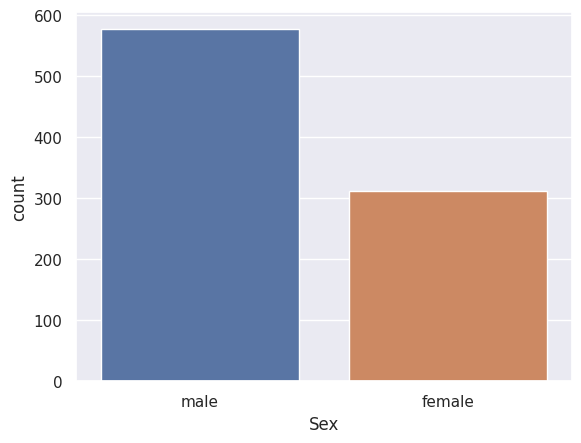

In [136]:
sns.countplot(x='Sex', data=df)

In [137]:
df['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

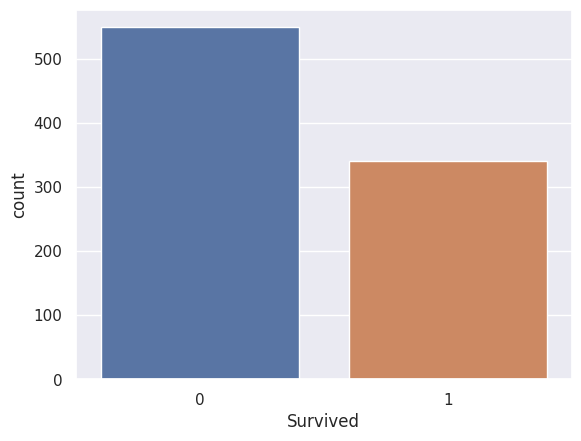

In [138]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Sex', ylabel='count'>

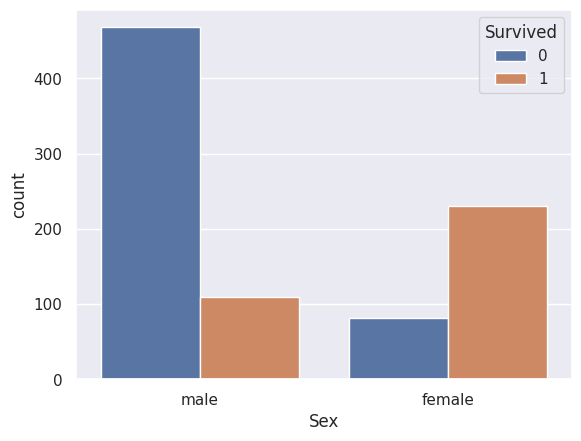

In [139]:
sns.countplot(x='Sex', hue='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

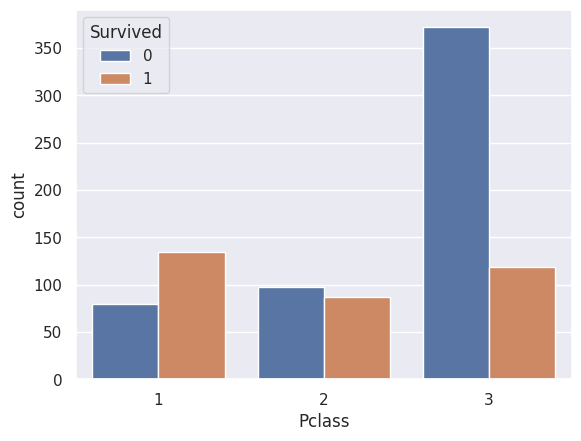

In [140]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [141]:
df[['Survived', 'Sex', 'Pclass']]

,Survived,Sex,Pclass
0,0,male,3
1,1,female,1
2,1,female,3
3,1,female,1
4,0,male,3
...,...,...,...
886,0,male,2
887,1,female,1
888,0,female,3
889,1,male,1


In [142]:
df.replace({'Sex': {'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}}, inplace = True)

In [143]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1,1
2,3,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0,1
4,5,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0,0
887,888,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0,0
889,890,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1,1


In [144]:
df.drop(columns = {'PassengerId', 'Name', 'Ticket'}, axis =1, inplace = True)

In [145]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.000000,1,0,7.2500,0,0
1,1,1,38.000000,1,0,71.2833,1,1
2,3,1,26.000000,0,0,7.9250,0,1
3,1,1,35.000000,1,0,53.1000,0,1
4,3,0,35.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,0
887,1,1,19.000000,0,0,30.0000,0,1
888,3,1,29.699118,1,2,23.4500,0,0
889,1,0,26.000000,0,0,30.0000,1,1


In [146]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

In [147]:
x=df.drop(columns ='Survived', axis =1)
y=df['Survived']

In [148]:
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[889 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=1)

x_train.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [150]:
model=LogisticRegression()

In [151]:
model.fit(x_train, y_train)

LogisticRegression()

In [152]:
x_train_prediction = model.predict(x_train)

In [153]:
print(x_train_prediction)

[0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1
 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0
 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0
 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1
 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0
 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 

In [154]:
training_data_accuracy = accuracy_score(y_train, x_train_prediction)

print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.790436005625879


In [155]:
x_test_prediction = model.predict(x_test)

In [156]:
print(x_test_prediction)

[1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0
 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0
 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 1
 1 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0]


In [157]:
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy score of testing data:', testing_data_accuracy)

Accuracy score of testing data: 0.848314606741573


In [159]:
test_data_precision = precision_score(y_test, x_test_prediction)
print('test data precion is:', test_data_precision)

test data precion is: 0.8026315789473685


In [162]:
test_data_recall = recall_score(y_train, x_train_prediction)
print('Test data recall is:', test_data_recall)

Test data recall is: 0.6853932584269663


In [163]:
from sklearn import metrics
score = model.score(x_test, y_test)
print(score)

0.848314606741573


In [164]:
cm = metrics.confusion_matrix(y_train, x_train_prediction)
print(cm)

[[379  65]
 [ 84 183]]


In [166]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_estimators = 100)
model_2.fit(x_train, y_train)

RandomForestClassifier()

In [167]:
x_test_pred = model_2.predict(x_test)

In [169]:
model_2.score(x_train, y_train)
acc_score = round(model_2.score(x_test, y_test) * 100, 2)
model_2_acc = accuracy_score(x_test_pred, y_test)

In [170]:
model_2_acc

0.8146067415730337

In [171]:
acc_score

81.46

In [172]:
precision = precision_score(x_test_pred, y_test)
recall = recall_score(x_test_pred, y_test)

In [173]:
print(precision)
print(recall)

0.7123287671232876
0.8125


In [174]:
print(x)
print(y)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[889 rows x 7 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [175]:
p1 = model.predict([[3,0,34.5,0,0,7.8292,2]])
p2 = model_2.predict([[3,0,34.5,0,0,7.8292,2]])

In [176]:
print(p1)
print(p2)

[0]
[0]
